# Car Accident Severity
### Capstone Project
### Sumeet Grewal

## Introduction

One of the most dangerous and complex activities we engage in on a daily basis is driving a vehicle. Increasing population density in major cities such as Seattle increases the propensity for traffic incidents and collisions. According to a dataset on collisions in the city of Seattle, there have been over 190 000 incidents since 2004. Traffic collisions have an enormous impact, most notably in terms of physical injury and in property damage. 

The key audience is the City of Seattle as they would ideally undertake initiatives to reduce the number and severity of traffic collisions. From a mitigation perspective, it would be unwise to apply resources uniformly across the city in order to address a specific issue. Mitigation efforts should be concentrated where they would have the greatest impact. 

It would thus be constructive to identify which intersections are the most dangerous. This way, the City of Seattle can optimally allocate their resources and mitigation tactics towards addressing key factors in key intersections.

It is also possible that certain environmental factors and driver behaviours increase the severity of collisions. Some of these conditions could be specific days and times, weather and road conditions, driver inattention, and speeding. 

The objective of this project is to understand which factors have the greatest impact on the severity of collisions in intersections, and identify which intersections could most benefit from mitigation tactics.


## Dataset

I will be using the provided dataset of all collisions provided by the Seattle Police Department (SPD) from 2004 - Present. 
The selected dataset contains all collisions provided by the Seattle Police Department (SPD) from 2004 - Present. It contains over 194000 records and 37 fields which are described in detail in the associated metadata file. The objective is to develop a model to accurately predict the ‘severitycode’ label. This field currently either contains a value of ‘1’ indicating property damage only or a value of ‘2’ indicating physical injury from the collision. 

There are many columns that describe the various details of the collision. The focus of this study will be on identifying the key contributors to the collision. Some of the fields that will be assessed for their impact on severity are: 


|     ATTRIBUTE         |     DATA TYPE     |     DESCRIPTION                                                                 |
|-----------------------|-------------------|---------------------------------------------------------------------------------|
|     INCDTTM           |     Text          |     Incident Date and Time                                                      |
|     WEATHER           |     Text          |     The weather conditions at the time of the collision                         |
|     ROADCOND          |     Text          |     The conditions of the road at the time of the collision                     |
|     LIGHTCOND         |     Text          |     The light conditions at the time of the collision                           |
|     INATTENTIONIND    |     Text (Y/N)    |     Whether or not the collision was due to inattention by the driver           |
|     SPEEDING          |     Text (Y/N)    |     Whether or not the collision was due to speeding by the driver              |
|     PEDROWNOTGRNT     |     Text (Y/N)    |     Whether or not the pedestrian right of way was not granted by the driver    |
|     UNDERINFL         |     Text (Y/N)    |     Whether or not the driver was under the influence of drugs or alcohol       |


Once the data has been prepared, the model will be trained on this data to predict the severity. This will help to identify which factors are most significant in the severity of a collision. As the objective is to determine the class label of a categorical target attribute, a classification model is most appropriate. As the data is binary and we are looking to understand the impact of various features, a Logistic Regression model is likely the best choice. Other models such as Support Vector Machine and Decision Trees may also be evaluated for their accuracy. 


## Exploratory Data Analysis

### Load the Data

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [129]:
# Import the Dataset
url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
# df = pd.read_csv(url)
df = pd.read_csv("../Data-Collisions.csv")

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [130]:
df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [131]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 

### Data Preparation and Cleaning

There are a number of columns that are used to describe the outcome and severity of the collision. The column 'SEVERITYCODE' is the only column that will be used to measure the severity so the other columns can be dropped. These include 'PEDCOUNT', 'PERSONCOUNT', 'INJURIES', and so on.
The column 'SEVERITYDESC' is redundant information to 'SEVERITYCODE' so it can also be removed. 

In [132]:
df.columns

Index([&#39;SEVERITYCODE&#39;, &#39;X&#39;, &#39;Y&#39;, &#39;OBJECTID&#39;, &#39;INCKEY&#39;, &#39;COLDETKEY&#39;, &#39;REPORTNO&#39;,
       &#39;STATUS&#39;, &#39;ADDRTYPE&#39;, &#39;INTKEY&#39;, &#39;LOCATION&#39;, &#39;EXCEPTRSNCODE&#39;,
       &#39;EXCEPTRSNDESC&#39;, &#39;SEVERITYCODE.1&#39;, &#39;SEVERITYDESC&#39;, &#39;COLLISIONTYPE&#39;,
       &#39;PERSONCOUNT&#39;, &#39;PEDCOUNT&#39;, &#39;PEDCYLCOUNT&#39;, &#39;VEHCOUNT&#39;, &#39;INCDATE&#39;,
       &#39;INCDTTM&#39;, &#39;JUNCTIONTYPE&#39;, &#39;SDOT_COLCODE&#39;, &#39;SDOT_COLDESC&#39;,
       &#39;INATTENTIONIND&#39;, &#39;UNDERINFL&#39;, &#39;WEATHER&#39;, &#39;ROADCOND&#39;, &#39;LIGHTCOND&#39;,
       &#39;PEDROWNOTGRNT&#39;, &#39;SDOTCOLNUM&#39;, &#39;SPEEDING&#39;, &#39;ST_COLCODE&#39;, &#39;ST_COLDESC&#39;,
       &#39;SEGLANEKEY&#39;, &#39;CROSSWALKKEY&#39;, &#39;HITPARKEDCAR&#39;],
      dtype=&#39;object&#39;)

In [133]:
df.drop(labels=['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT'], axis=1, inplace=True)
df.drop(labels=['SEVERITYDESC'], axis=1, inplace=True)

Several of the attributes are primarily for identification and tracking purposes so they won't be useful for the model and can be dropped as well

In [134]:
df.drop(labels=['INCKEY', 'COLDETKEY', 'LOCATION', 'EXCEPTRSNCODE', 'LOCATION','EXCEPTRSNDESC', 'ST_COLCODE', 'ST_COLDESC', 'OBJECTID', 'INCDATE', 'JUNCTIONTYPE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'X', 'Y', 'REPORTNO', 'STATUS', 'SEVERITYCODE.1', 'INCDTTM', 'SDOTCOLNUM', 'SDOT_COLCODE', 'SDOT_COLDESC'], axis=1, inplace=True)

In [135]:
df.columns

Index([&#39;SEVERITYCODE&#39;, &#39;ADDRTYPE&#39;, &#39;INTKEY&#39;, &#39;COLLISIONTYPE&#39;, &#39;INATTENTIONIND&#39;,
       &#39;UNDERINFL&#39;, &#39;WEATHER&#39;, &#39;ROADCOND&#39;, &#39;LIGHTCOND&#39;, &#39;PEDROWNOTGRNT&#39;,
       &#39;SPEEDING&#39;],
      dtype=&#39;object&#39;)

In [136]:
# Examine value counts for each of remaining fields

for attribute in df.columns: 
    print(df[attribute].value_counts())
    print(df[attribute].isnull().value_counts())
    print()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
False    194673
Name: SEVERITYCODE, dtype: int64

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

29973.0    252
29933.0    160
29913.0    138
29549.0    136
33512.0    128
          ... 
36825.0      1
26604.0      1
26603.0      1
36816.0      1
27793.0      1
Name: INTKEY, Length: 7614, dtype: int64
True     129603
False     65070
Name: INTKEY, dtype: int64

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

Y    29805
Name: INATTENTIONIND, dtype: int64
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

N    100274
0     80394
Y      5126
1      3995
Name

Text(0, 0.5, &#39;Number of Collisions&#39;)

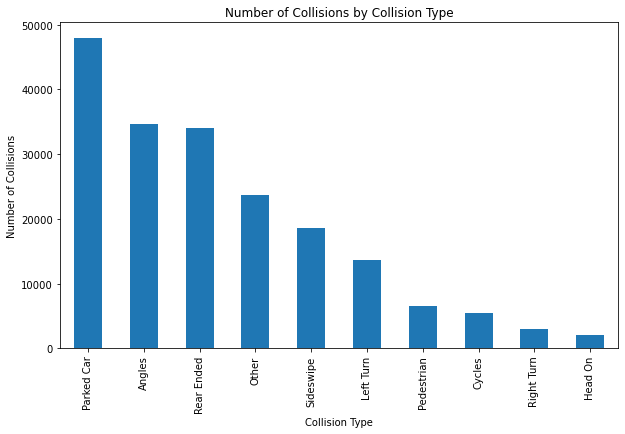

In [137]:
df['COLLISIONTYPE'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title("Number of Collisions by Collision Type")
plt.xlabel("Collision Type")
plt.ylabel("Number of Collisions")

### Data Cleaning

In [138]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   ADDRTYPE        192747 non-null  object 
 2   INTKEY          65070 non-null   float64
 3   COLLISIONTYPE   189769 non-null  object 
 4   INATTENTIONIND  29805 non-null   object 
 5   UNDERINFL       189789 non-null  object 
 6   WEATHER         189592 non-null  object 
 7   ROADCOND        189661 non-null  object 
 8   LIGHTCOND       189503 non-null  object 
 9   PEDROWNOTGRNT   4667 non-null    object 
 10  SPEEDING        9333 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 16.3+ MB


In [139]:
df.describe(include='all')

,SEVERITYCODE,ADDRTYPE,INTKEY,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
count,194673.000000,192747,65070.000000,189769,29805,189789,189592,189661,189503,4667,9333
unique,NaN,3,NaN,10,1,4,11,9,9,1,1
top,NaN,Block,NaN,Parked Car,Y,N,Clear,Dry,Daylight,Y,Y
freq,NaN,126926,NaN,47987,29805,100274,111135,124510,116137,4667,9333
mean,1.298901,NaN,37558.450576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.457778,NaN,51745.990273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,23807.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,28667.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,29973.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,NaN,33973.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Convert INTKEY to int and replace nan with 0
df['INTKEY'].replace(np.nan, 0.0, inplace=True)
df[['INTKEY']] = df[['INTKEY']].astype(int)

In [141]:
# Columns SPEEDING, PEDROWNOTGRNT, and INATTENTIONIND all contain NaN values instead of N. Convert Y to 1 and NaN to 0
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [142]:
df['SPEEDING'].replace('Y', 1, inplace=True)
df['SPEEDING'].replace(np.nan, 0, inplace=True)
df[['SPEEDING']] = df[['SPEEDING']].astype(int)

df['PEDROWNOTGRNT'].replace('Y', 1, inplace=True)
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace=True)
df[['PEDROWNOTGRNT']] = df[['PEDROWNOTGRNT']].astype(int)

df['INATTENTIONIND'].replace('Y', 1, inplace=True)
df['INATTENTIONIND'].replace(np.nan, 0, inplace=True)
df[['INATTENTIONIND']] = df[['INATTENTIONIND']].astype(int)

In [143]:
# Convert UNDERINFL to two values and drop nan
df['UNDERINFL'].replace('Y', 1, inplace=True)
df['UNDERINFL'].replace('N', 0, inplace=True)
df.dropna(subset=["UNDERINFL"], inplace=True)
df[['UNDERINFL']] = df[['UNDERINFL']].astype(int)
df['UNDERINFL'].value_counts()

0    180668
1      9121
Name: UNDERINFL, dtype: int64

In [144]:
# Drop records that don't have a value for WEATHER, ROADCOND, and LIGHTCOND
df.dropna(subset=['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=0, inplace=True)

for value in ['WEATHER', 'ROADCOND', 'LIGHTCOND'] : 
    print(df[value].isnull().value_counts())

False    189337
Name: WEATHER, dtype: int64
False    189337
Name: ROADCOND, dtype: int64
False    189337
Name: LIGHTCOND, dtype: int64


In [145]:
df.describe(include="all")

,SEVERITYCODE,ADDRTYPE,INTKEY,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
count,189337.000000,187525,189337.000000,189316,189337.000000,189337.000000,189337,189337,189337,189337.000000,189337.000000
unique,NaN,3,NaN,10,NaN,NaN,11,9,9,NaN,NaN
top,NaN,Block,NaN,Parked Car,NaN,NaN,Clear,Dry,Daylight,NaN,NaN
freq,NaN,123321,NaN,47815,NaN,NaN,111008,124300,116077,NaN,NaN
mean,1.301325,NaN,12564.472602,NaN,0.156985,0.048052,NaN,NaN,NaN,0.024639,0.049219
std,0.458835,NaN,34572.424364,NaN,0.363787,0.213876,NaN,NaN,NaN,0.155022,0.216326
min,1.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,1.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
50%,1.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
75%,2.000000,NaN,28734.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000


There are now 189337 records remaining


In [166]:
print('Inattentive driver: %.2f percent of records' % (df['INATTENTIONIND'].mean()*100))
print('Speeding driver: %.2f percent of records' % (df['SPEEDING'].mean()*100))
print('Driver under the influence: %.2f percent of records' % (df['UNDERINFL'].mean()*100))


Inattentive driver: 15.70 percent of records
Speeding driver: 4.92 percent of records
Driver under the influence: 4.81 percent of records


Less than 5 % of the remaining records involve a speeding driver or a driver under the influence of drugs or alcohol. In addition, only 15.7% of the remaining records involve driver inattention as a factor. This means the dataset is not balanced for these attributes.